## Задание 09
В этом задании мы разберемся с тем, как работают методы снижения размерности и кластеризации данных. 
Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones).  Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3 (подробнее про признаки – по ссылке на UCI выше), также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице. 

Мы представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков. 

* Скачайте данные самостоятельно. Объедините тестовую и обучающую выборку в одну (для задачи кластеризации тестовая выборка не понадобится). 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.loadtxt("X_train.txt")
X_test = np.loadtxt("X_test.txt")
y_train = np.loadtxt("y_train.txt")
y_test = np.loadtxt("y_test.txt")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7352, 561) (7352,) (2947, 561) (2947,)


In [3]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
print(X.shape,y.shape)

(10299, 561) (10299,)


* Определите число уникальных значений меток целевого класса. Будем использовать это значения для числа кластеров (в общем случае, число кластеров, мы естественно не знаем). 

In [21]:
y_unique = np.unique(y)
N = len(y_unique)
N

6

* Отмасштабируйте выборку с помощью `StandardScaler` с параметрами по умолчанию.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_st = scaler.fit_transform(X,y)

* С помощью PCA, оставьте столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Какое минимальное число главных компонент нужно выделить, чтобы объяснить 90% дисперсии исходных (отмасштабированных) данных?

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_st)
dis = 0
for i, e in enumerate(pca.explained_variance_ratio_):
    dis+= e
    if(dis>0.9):
        print('Нужно выделить минимум ', i+1, 'компонент, чтобы объяснить 90% дисперсии исходных (отмасштабированных) данных')
        break

Нужно выделить минимум  65 компонент, чтобы объяснить 90% дисперсии исходных (отмасштабированных) данных


* Сколько процентов дисперсии приходится на первую главную компоненту?

In [37]:
print('на первую главную компоненту приходится',pca.explained_variance_ratio_[0]/0.9*100,'процентов дисперсии')

на первую главную компоненту приходится 56.375801150014816 процентов дисперсии


* Визуализируйте данные в проекции на первые две главные компоненты.

Meaning of the 2 components:
0.000 x 5.0 + -0.003 x 5.0 + -0.002 x 5.0 + 0.056 x 5.0 + 0.057 x 5.0 + 0.054 x 5.0 + 0.056 x 5.0 + 0.056 x 5.0 + 0.054 x 5.0 + 0.056 x 5.0 + 0.055 x 5.0 + 0.054 x 5.0 + -0.056 x 5.0 + -0.056 x 5.0 + -0.053 x 5.0 + 0.058 x 5.0 + 0.051 x 5.0 + 0.052 x 5.0 + 0.047 x 5.0 + 0.055 x 5.0 + 0.055 x 5.0 + 0.052 x 5.0 + 0.048 x 5.0 + 0.050 x 5.0 + 0.048 x 5.0 + -0.041 x 5.0 + 0.034 x 5.0 + -0.021 x 4.0 + 0.016 x 4.0 + -0.033 x 4.0 + 0.032 x 4.0 + -0.010 x 4.0 + 0.000 x 4.0 + -0.030 x 4.0 + 0.032 x 4.0 + -0.015 x 4.0 + 0.008 x 4.0 + -0.022 x 4.0 + -0.003 x 4.0 + 0.010 x 4.0 + 0.024 x 4.0 + -0.030 x 4.0 + -0.027 x 4.0 + 0.009 x 4.0 + 0.011 x 4.0 + 0.012 x 4.0 + 0.009 x 4.0 + 0.011 x 4.0 + 0.012 x 4.0 + 0.025 x 4.0 + -0.029 x 4.0 + -0.027 x 6.0 + 0.023 x 6.0 + -0.030 x 6.0 + -0.028 x 6.0 + -0.007 x 6.0 + 0.024 x 6.0 + -0.020 x 6.0 + -0.019 x 6.0 + 0.009 x 6.0 + 0.011 x 6.0 + 0.011 x 6.0 + 0.023 x 6.0 + -0.014 x 6.0 + -0.002 x 6.0 + -0.008 x 6.0 + 0.015 x 6.0 + -0.021 x

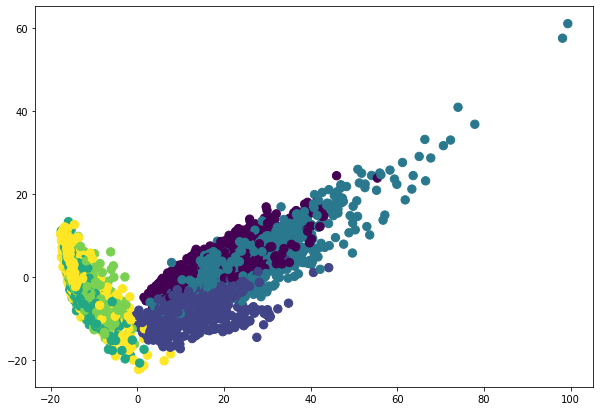

In [46]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_st)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            y)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

* Сделайте кластеризацию данных методом `KMeans`, обучив модель на данных со сниженной за счет PCA размерностью.  

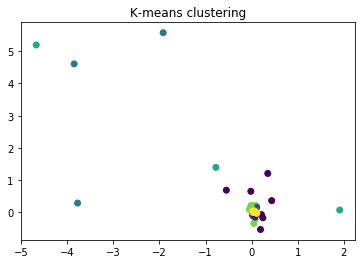

In [55]:
from sklearn.cluster import KMeans
X_pca = []
for i in range(len(X_st)):
    if(i<65):
        X_pca.append(X_st[i])
X_pca = np.array(X_pca)
k_means = KMeans(n_clusters = 6)
k_means = k_means.fit(X_pca)
clusters = k_means.predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters)
plt.title('K-means clustering')
plt.show()

* Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

* Сделайте кластеризацию с помощью агломеративного метода. 

In [ ]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca)

* Cравните работу двух алгоритмов по значениям [Adjusted Rand Index (ARI)](https://en.wikipedia.org/wiki/Rand_index).

**Adjusted Rand Index (ARI)**

Предполагается, что известны истинные метки объектов. Данная мера не зависит от самих значений меток, а только от разбиения выборки на кластеры. Пусть $N$ - число объектов в выборке. Обозначим через $a$ - число пар объектов, имеющих одинаковые метки и находящихся в одном кластере, через $b$ - число пар объектов, имеющих различные метки и находящихся в разных кластерах. Тогда Rand Index это $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$ То есть это доля объектов, для которых эти разбиения (исходное и полученное в результате кластеризации) "согласованы". Rand Index (RI) выражает схожесть двух разных кластеризаций одной и той же выборки. Чтобы этот индекс давал значения близкие к нулю для случайных кластеризаций при любом $N$ и числе кластеров, необходимо нормировать его. Так определяется Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Эта мера симметрична, не зависит от значений и перестановок меток. Таким образом, данный индекс является мерой расстояния между различными разбиениями выборки. $\text{ARI}$ принимает значения в диапазоне $[-1, 1]$. Отрицательные значения соответствуют "независимым" разбиениям на кластеры, значения, близкие к нулю, - случайным разбиениям, и положительные значения говорят о том, что два разбиения схожи (совпадают при $\text{ARI} = 1$).

In [1]:
from sklearn.metrics.cluster import adjusted_rand_score